# DAAR TME 7 - ALGORITHMIC ASSESSMENT K-MEANS CLUSTER
#### student name: SEBASTIAN CELEITA - STUDENT NUMBER 28716405

This TP is divided in 2 parts:


**PART 1:** 
- The file RandomPointsGenerator.class was decompiled and runned in Python to create the same random distribuition as the Java class shared by professors in  new canvas files (http://www-apr.lip6.fr/~buixuan/files/daar2021/kMeans/kMeansEval.jar) 
- Proposed KMeans Algorithm with WCSS score.
- Implementation for 200 input instances
- Print out the running time, average score and plotting the last instance.

**PART 2:** 
- The same exercise running the SKLEARN libraries, we can consider this part as our BOT, the WCSS will be the baseline to compared our implementation in Part 1.


We can use the following libraries.

In [292]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
print(sys.version)

3.8.11 (default, Aug  3 2021, 15:09:35) 
[GCC 7.5.0]


## PART 1 - Reverse Engineer RandomPointsGenerator.class and coding KMeans from scratch

According to the class shared by the professor, new set of random points will define an array with 1000 points, then we call our proposed Kmeans function and per each instance we will compute its score by WCSS - within-cluster sums of squares. Finally we will run 200 instances and wil print the running time, average score and plot the last configuration.

FOR 200 different input instances of the test
AVERAGE SCORE: 395.06347920657674

RUNNING TIME:  36240.08750915527 msecs


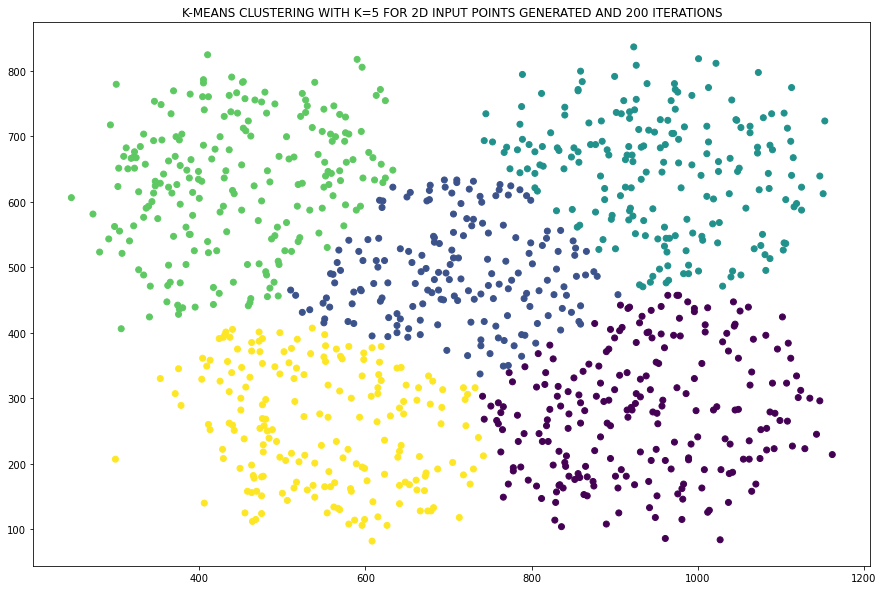

In [296]:
def KMeans2(X,k=5,max_iterations=200):
    sc = StandardScaler()
    sc.fit(X)
    X =sc.transform(X)
    idx = np.random.choice(len(X), k, replace=False) # Select random number for indexing random point as centroid
    centroids = [X[idx[0]],X[idx[1]],X[idx[2]],X[idx[3]],X[idx[4]]] # Normalized centroids random selection
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    for _ in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
    return (P,sc,X,centroids)

def distanceToCenter(x,y):
    maxWidth = 1400
    maxHeight = 900
    arg1 = min(np.sqrt(np.power((x - maxWidth / 2), 2) + np.power((y - maxHeight / 2), 2)),np.sqrt(np.power(x - 2.5 * maxWidth / 6, 2) + np.power((y - 2 * maxHeight / 6), 2)))
    arg2 = min(np.sqrt(np.power((x - 4 * maxWidth / 6), 2) + np.power((y - 2 * maxHeight / 6), 2)),np.sqrt(np.power((x - 2 * maxWidth / 6), 2) + np.power((y - 4 * maxHeight / 6), 2)))
    arg3 = np.sqrt(np.power((x - 4 * maxWidth / 6), 2) + np.power((y - 4 * maxHeight / 6), 2))
    distance = min(min(arg1,arg2),arg3)
    return(distance)

def RandomPointsGenerator():
    numberOfPoints = 1000
    maxWidth = 1400
    maxHeight = 900
    radius = 140
    i=0
    input_points = {}
    while i<numberOfPoints:
        x,y=1,1
        lsi = []
        while (not(distanceToCenter(x, y) < radius * 1.4) and (not(distanceToCenter(x, y) < radius * 1.6) or np.random.randint(5) != 1) and (not(distanceToCenter(x, y) < radius * 1.8) or np.random.randint(10) != 1)  and ((maxHeight / 5 > x) or (x > (4 * maxHeight / 5)) or (maxHeight / 5 > y) or (y > (4 * maxHeight/5)) or (np.random.randint(100) != 1))):
            x=np.random.randint(maxWidth)
            y=np.random.randint(maxHeight)
        i = i+1
        lsi.append(x)
        lsi.append(y)
        input_points[i]=lsi
    data = list(input_points.values())
    an_array = np.asarray(data,dtype=object)
    return(an_array)

def WCSS(S):
    return np.sum(np.amin(S, axis = 1))

def compute_d2(X, centers):
    return np.linalg.norm(X[:, np.newaxis, :] - centers, ord=2, axis=2) ** 2

# DRIVER CODE
i=0
SCORE1 = []
start = time.time()
while i<200:
    input_points_new = RandomPointsGenerator()
    P2,sc2,X2,centroids = KMeans2(input_points_new)
    S = compute_d2(X2, centroids)
    SCORE1.append(WCSS(S))
    i=i+1

print("FOR 200 different input instances of the test")
print("AVERAGE SCORE:",np.mean(SCORE1))
end = time.time()
print("\nRUNNING TIME: ",(end - start)*1000, "msecs")

# denormalize data and plot last instance
X2 = sc2.inverse_transform(X2)

XV =[]
for i in range(0,len(X2)):
    XV.append(X2[i][0])
YV =[]
for i in range(0,len(X2)):
    YV.append(X2[i][1])
    
plt.figure(figsize=(15,10))
plt.scatter(XV,YV,c=P2)
plt.title("K-MEANS CLUSTERING WITH K=5 FOR 2D INPUT POINTS GENERATED AND 200 ITERATIONS")
plt.show()

## Comparing the score and running time with SKLEARN KMEANS library (could be considered as the BOT)

In [297]:
from sklearn.cluster import KMeans
i=0
SCORE2 = []
start = time.time()
while i<200:
    IN_PO = RandomPointsGenerator()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(IN_PO)
    kmeans = KMeans(n_clusters=5,init = 'k-means++',random_state=42).fit(scaled_features)
    score = kmeans.inertia_
    SCORE2.append(score)
    i=i+1

print("FOR 200 different input instances of the test")
print("AVERAGE SCORE BY SKLEARN:",np.mean(SCORE2))
end = time.time()
print("\nRUNNING TIME: ",(end - start)*1000, "msecs")

print('\033[1m'+"ASSESMENT EVALUATION:",np.mean(SCORE1)*100/np.mean(SCORE2),"%")

FOR 200 different input instances of the test
AVERAGE SCORE BY SKLEARN: 393.38150061577966

RUNNING TIME:  43816.9960975647 msecs
ASSESMENT EVALUATION: 100.42756931583315 %
